<a href="https://colab.research.google.com/github/rasyidabdi/MachineLearningTask/blob/main/Week10/Rasyid%20Abdi_1103204127%20NN%20D2L.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount ('/content/drive')


Mounted at /content/drive


Nama : Rasyid Abdi Gantoro

Nim :  1103204127

DATASET : housingprice.csv

In [2]:
!pip install d2l

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 51.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 65.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 81.3 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.2
    Uninstalling pyparsing-3.1.2:
      Successfully uninstalled pyparsing-3.1.2
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
  Attempting uninstall: matplotlib-i

In [2]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
from d2l import torch as d2l
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load dataset
data_path = '/content/drive/MyDrive/DATASET/housepricedata.csv'
data = pd.read_csv(data_path)

In [4]:
data.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [5]:
data.tail()


,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0
1459,9937,5,6,1256,1,1,3,6,0,276,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   LotArea           1460 non-null   int64
 1   OverallQual       1460 non-null   int64
 2   OverallCond       1460 non-null   int64
 3   TotalBsmtSF       1460 non-null   int64
 4   FullBath          1460 non-null   int64
 5   HalfBath          1460 non-null   int64
 6   BedroomAbvGr      1460 non-null   int64
 7   TotRmsAbvGrd      1460 non-null   int64
 8   Fireplaces        1460 non-null   int64
 9   GarageArea        1460 non-null   int64
 10  AboveMedianPrice  1460 non-null   int64
dtypes: int64(11)
memory usage: 125.6 KB


In [7]:
data.describe()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,6.099315,5.575342,1057.429452,1.565068,0.382877,2.866438,6.517808,0.613014,472.980137,0.498630
std,9981.264932,1.382997,1.112799,438.705324,0.550916,0.502885,0.815778,1.625393,0.644666,213.804841,0.500169
min,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,7553.500000,5.000000,5.000000,795.750000,1.000000,0.000000,2.000000,5.000000,0.000000,334.500000,0.000000
50%,9478.500000,6.000000,5.000000,991.500000,2.000000,0.000000,3.000000,6.000000,1.000000,480.000000,0.000000
75%,11601.500000,7.000000,6.000000,1298.250000,2.000000,1.000000,3.000000,7.000000,1.000000,576.000000,1.000000
max,215245.000000,10.000000,9.000000,6110.000000,3.000000,2.000000,8.000000,14.000000,3.000000,1418.000000,1.000000


In [8]:
# Preprocess data
# Assume the last column is the target
features = data.iloc[:, :-1].values
labels = data.iloc[:, -1].values
# Convert to torch tensors
features = torch.tensor(features, dtype=torch.float32)
labels = torch.tensor(labels, dtype=torch.float32).view(-1, 1)
# Normalize features
mean = features.mean(dim=0, keepdim=True)
std = features.std(dim=0, keepdim=True)
features = (features - mean) / std
# Create dataset
dataset = TensorDataset(features, labels)
# Split dataset into train and test
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])
# Create dataloaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [9]:
# Define model
class HousePriceModel(nn.Module):
    def __init__(self):
        super(HousePriceModel, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(features.shape[1], 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.net(x)

model = HousePriceModel()

In [10]:
# Loss and optimizer
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [11]:
# Training loop
num_epochs = 100

for epoch in range(num_epochs):
    model.train()
    for X, y in train_loader:
        optimizer.zero_grad()
        pred = model(X)
        loss = loss_fn(pred, y)
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 0.0518
Epoch [20/100], Loss: 0.0173
Epoch [30/100], Loss: 0.0480
Epoch [40/100], Loss: 0.0120
Epoch [50/100], Loss: 0.0181
Epoch [60/100], Loss: 0.0291
Epoch [70/100], Loss: 0.1031
Epoch [80/100], Loss: 0.0066
Epoch [90/100], Loss: 0.0694
Epoch [100/100], Loss: 0.0255


In [12]:
# Evaluate model
model.eval()
with torch.no_grad():
    test_loss = 0
    for X, y in test_loader:
        pred = model(X)
        test_loss += loss_fn(pred, y).item()
    test_loss /= len(test_loader)
    print(f'Test Loss: {test_loss:.4f}')


Test Loss: 0.1253


In [13]:
# Set style for seaborn
sns.set(style="whitegrid")

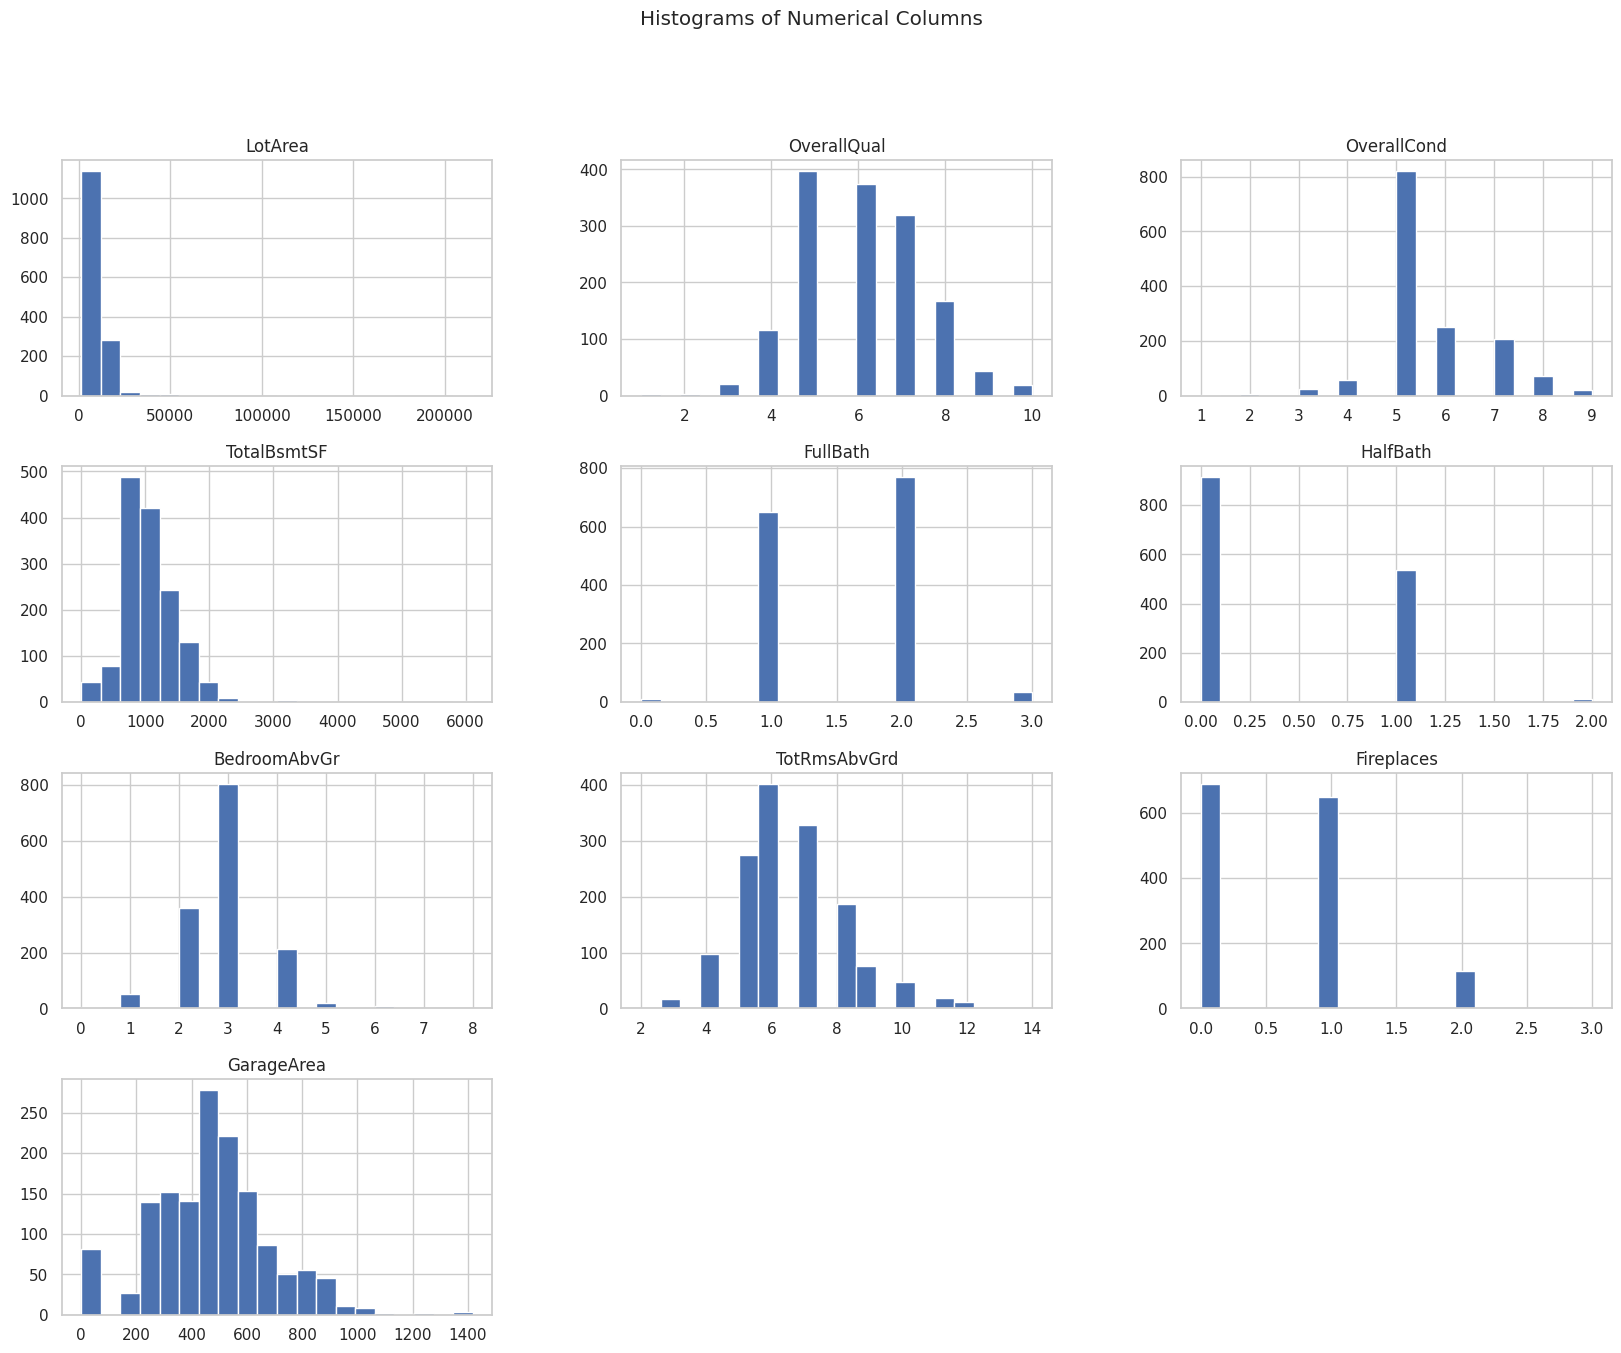

In [14]:
# 1. Histogram
def plot_histograms(df, columns, bins=20, figsize=(20, 15)):
    df[columns].hist(bins=bins, figsize=figsize)
    plt.suptitle('Histograms of Numerical Columns')
    plt.show()

# Assume numerical columns are all except the last one (if the last one is the target)
numerical_columns = data.columns[:-1]
plot_histograms(data, numerical_columns)

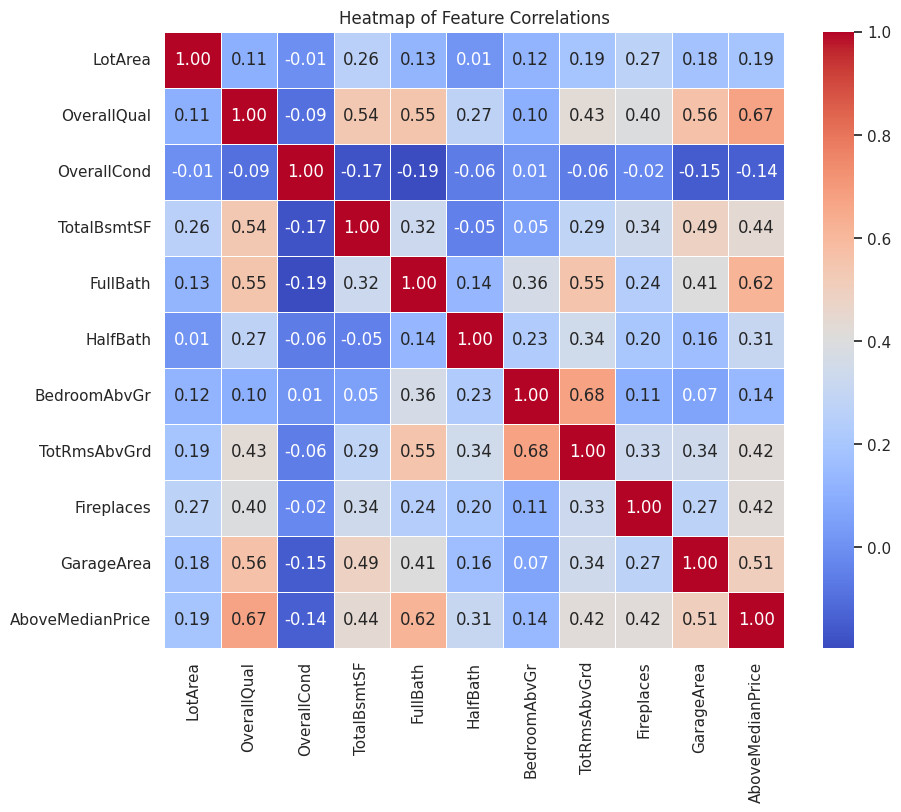

In [15]:
# 2. Heatmap
def plot_heatmap(df, figsize=(10, 8)):
    plt.figure(figsize=figsize)
    corr = df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Heatmap of Feature Correlations')
    plt.show()

plot_heatmap(data)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


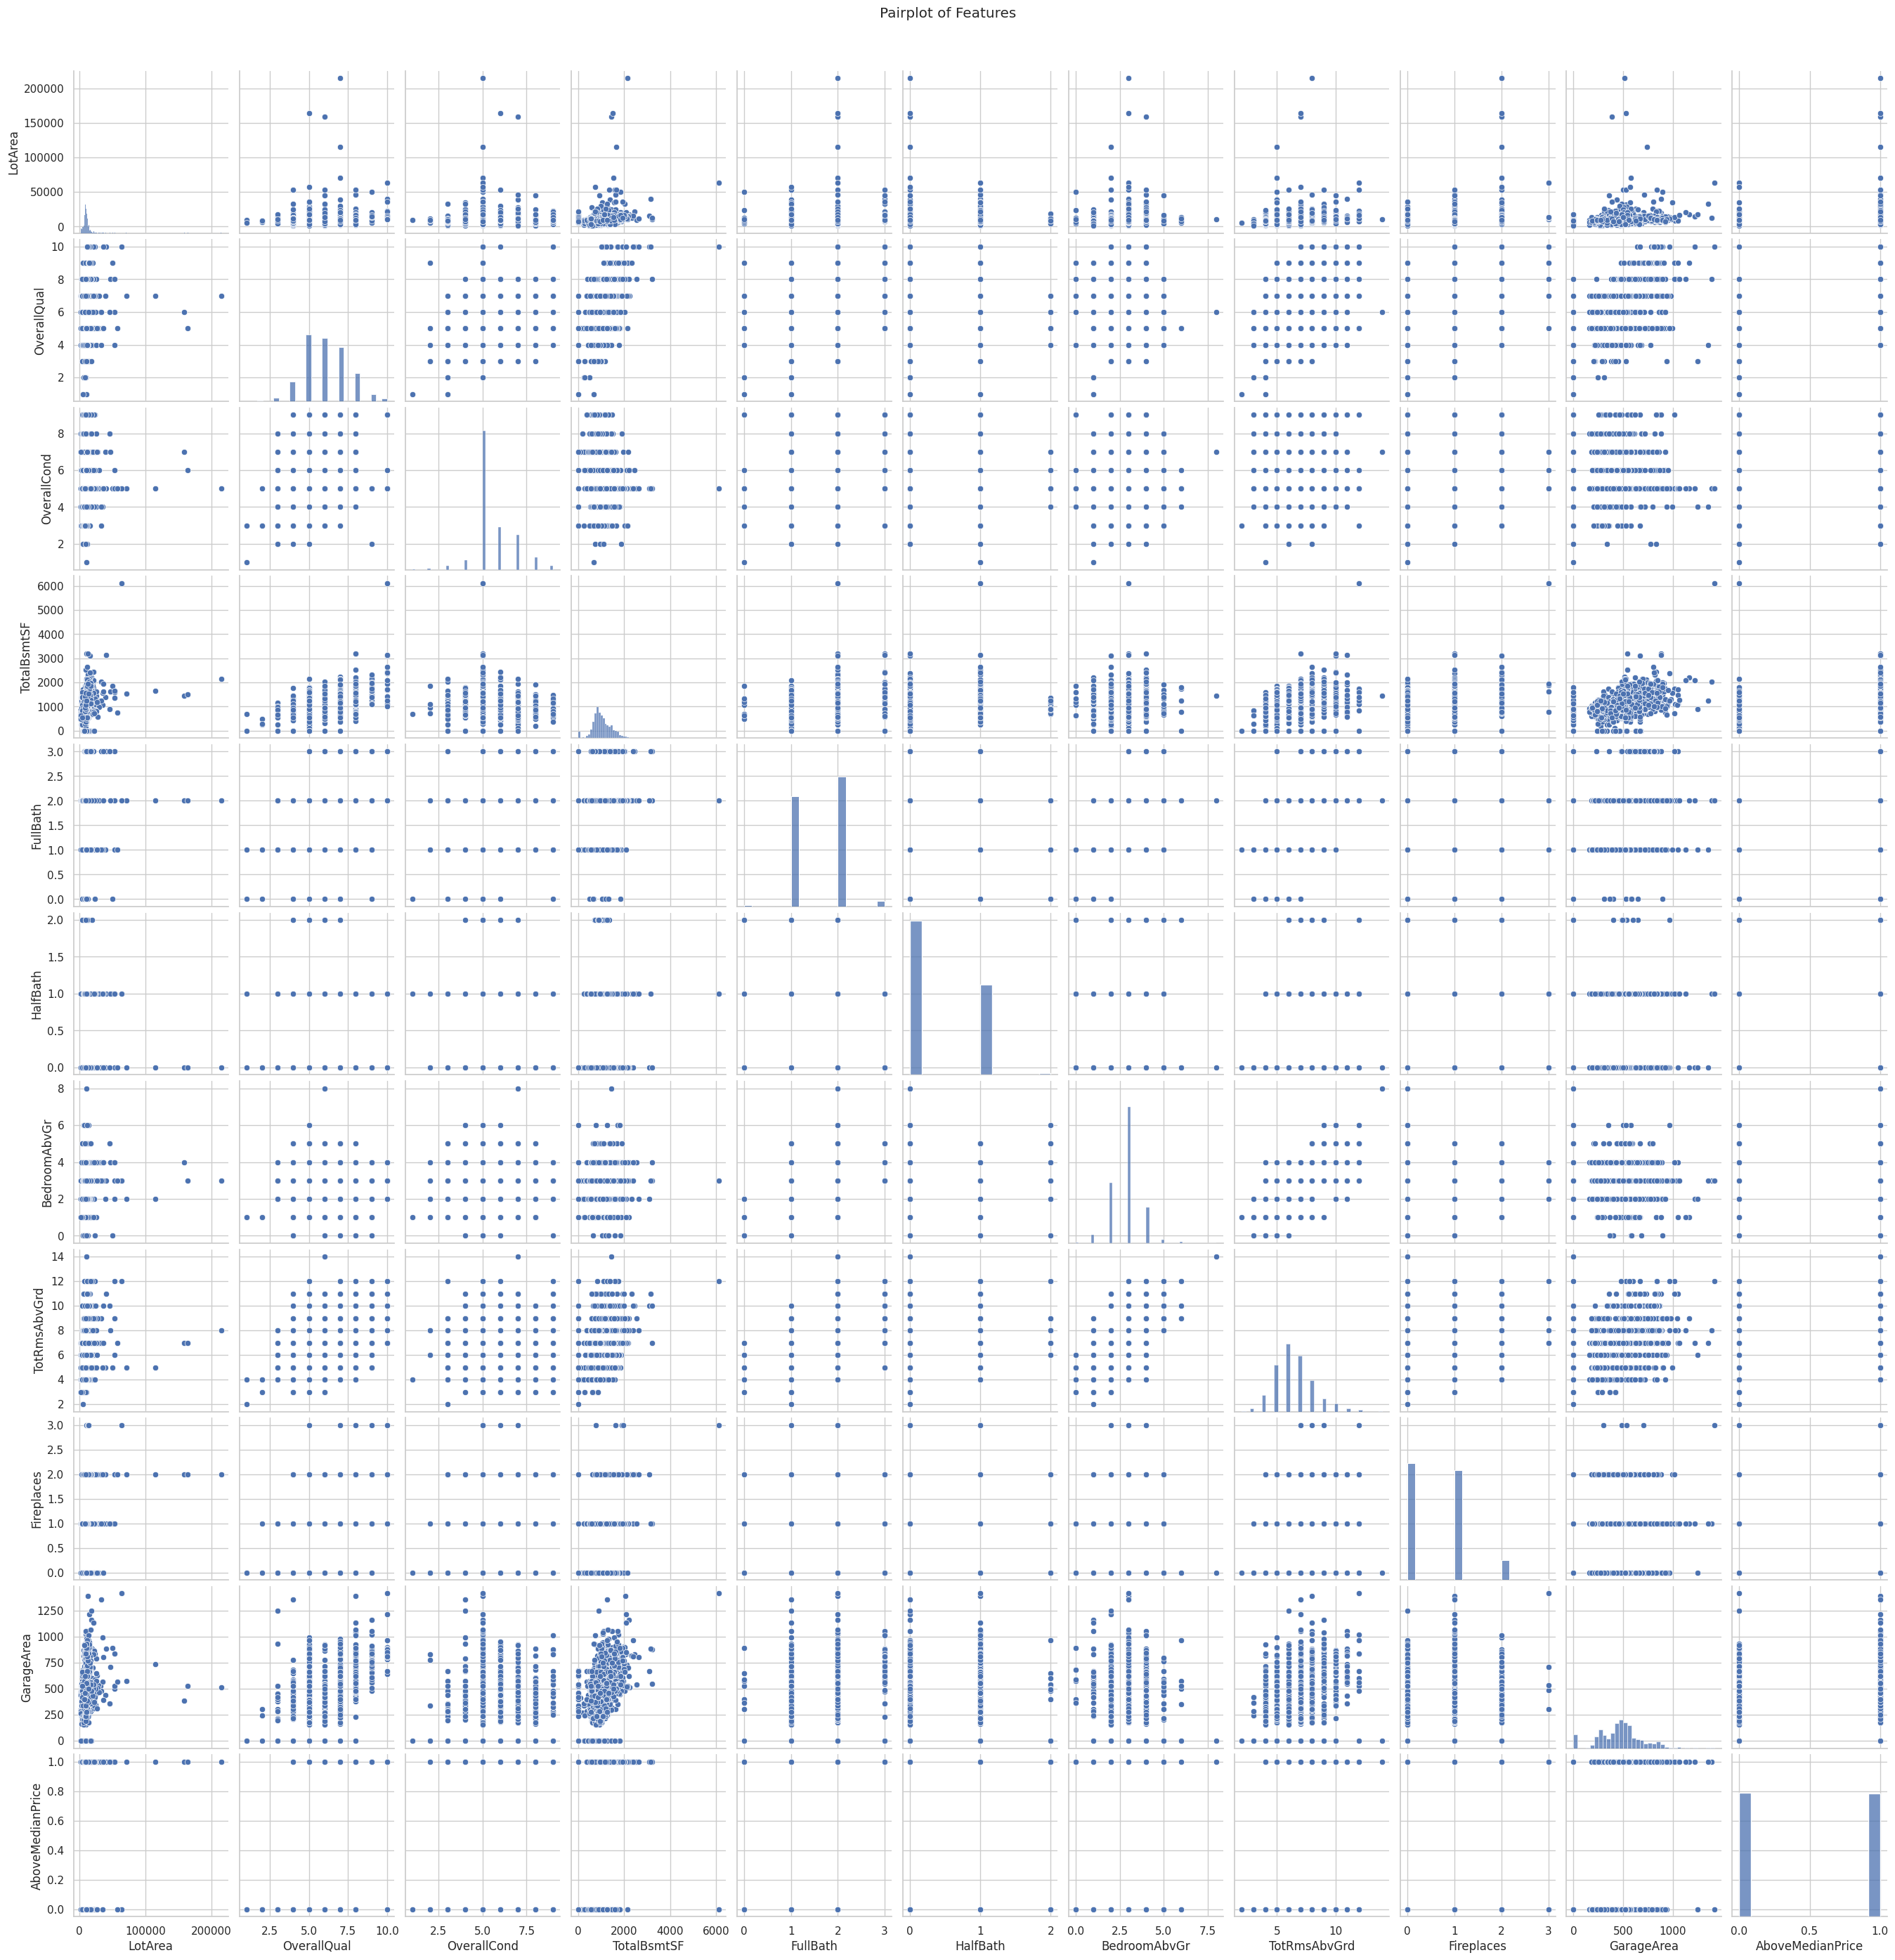

In [16]:
# 3. Pairplot
def plot_pairplot(df, columns):
    sns.pairplot(df[columns])
    plt.suptitle('Pairplot of Features', y=1.02)
    plt.show()

plot_pairplot(data, data.columns)

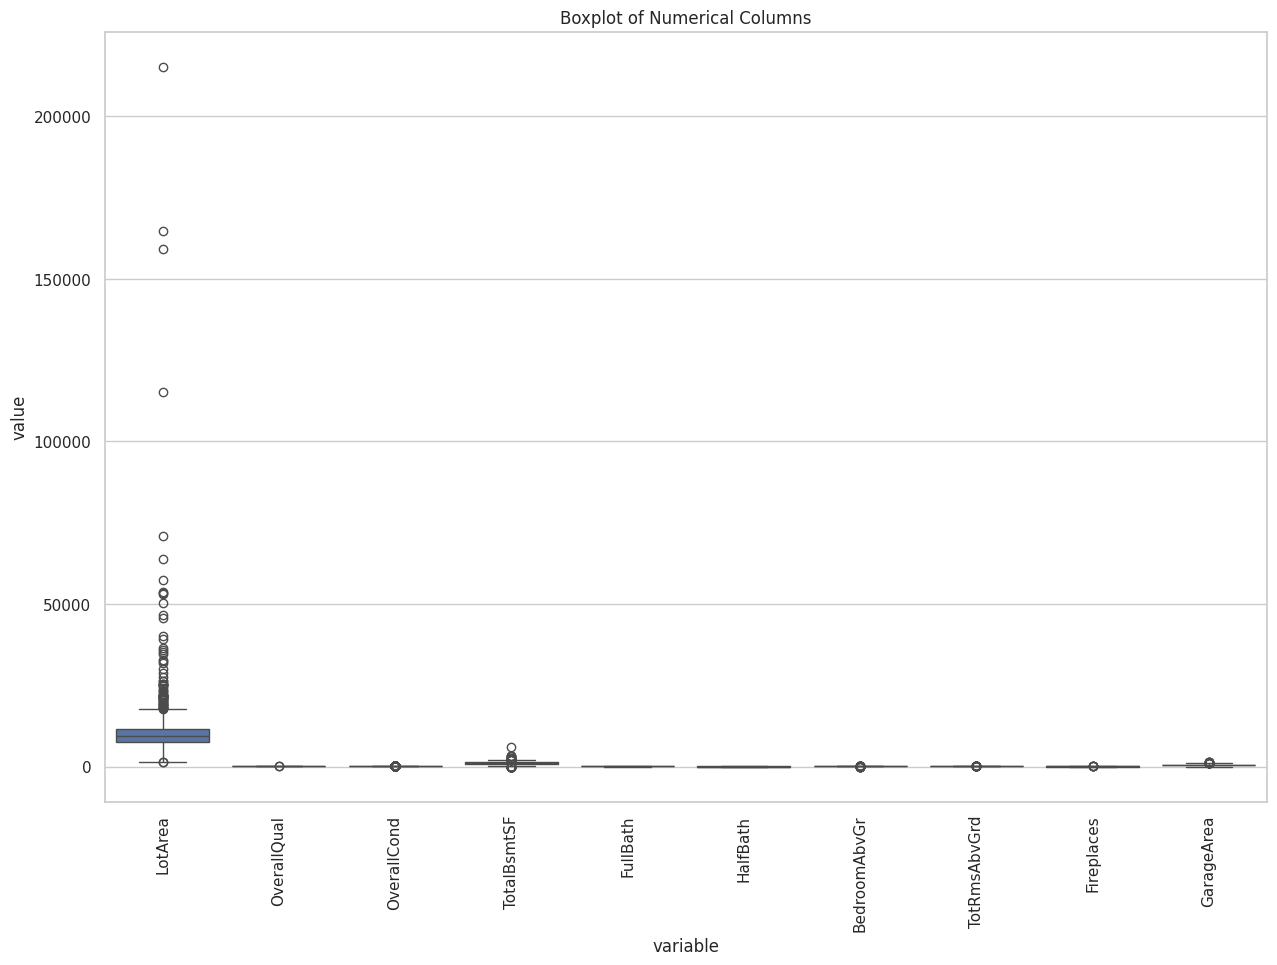

In [17]:
# 4. Boxplot
def plot_boxplots(df, columns, target, figsize=(15, 10)):
    df_melt = df.melt(id_vars=target, value_vars=columns)
    plt.figure(figsize=figsize)
    sns.boxplot(x='variable', y='value', data=df_melt)
    plt.xticks(rotation=90)
    plt.title('Boxplot of Numerical Columns')
    plt.show()

plot_boxplots(data, numerical_columns, target=data.columns[-1])